In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from datasets import load_dataset

/home/xd/Documents/machine_learning/ML_Notebooks/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = load_dataset("vargr/youtube")
df = pd.DataFrame(ds['train'])

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   channelId        130854 non-null  object        
 1   videoId          130854 non-null  object        
 2   title            130854 non-null  object        
 3   description      130854 non-null  object        
 4   views            130854 non-null  int64         
 5   url              130854 non-null  object        
 6   publishDate      130854 non-null  datetime64[ns]
 7   lengthSeconds    130854 non-null  int64         
 8   subscriberCount  130854 non-null  int64         
 9   videoCount       130854 non-null  int64         
 10  isVerified       130854 non-null  bool          
 11  keywords         130854 non-null  object        
 12  country          130854 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(4), object(7)
memory usage: 12.1+ MB


In [5]:
# extracting only the meaningful columns
meaningful_columns = ['title', 'description', 'views', 'publishDate', 'lengthSeconds', 'subscriberCount', 'videoCount', 'keywords', 'country']
df_meaningful = df[meaningful_columns]

In [6]:
# considering only english language titles, description
from langdetect import detect


def check_sentence_is_english(sentence: str) -> bool:
  try:
    return detect(sentence) == 'en'
  except Exception:
    return False


# df_meaningful['is_english'] = df['title'].apply(check_sentence_is_english)
df_meaningful = pd.read_csv("youtube_meaningfull_data.csv")

In [7]:
df_meaningful['title_length'] = df['title'].apply(lambda title: len(title.split()))
df_meaningful.info()
df_meaningful.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            130854 non-null  object
 1   description      122424 non-null  object
 2   views            130854 non-null  int64 
 3   publishDate      130854 non-null  object
 4   lengthSeconds    130854 non-null  int64 
 5   subscriberCount  130854 non-null  int64 
 6   videoCount       130854 non-null  int64 
 7   keywords         107730 non-null  object
 8   country          117401 non-null  object
 9   is_english       130854 non-null  bool  
 10  title_length     130854 non-null  int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 10.1+ MB


,title,description,views,publishDate,lengthSeconds,subscriberCount,videoCount,keywords,country,is_english,title_length
0,SWIMMING POOL CHALLENGE || 24 Hours Last To Le...,"Remember the ""floor is lava"" challenge? But wh...",2217916,2022-08-22,683,3840000,918,"123go,123 go,TikTok,tik tok,badaboom,bada boom...",United States,True,13
1,A GUY IS DATING TWO GIRLS AT A TIME || High Sc...,A new student is trying to establish contact w...,245998,2022-08-22,549,3840000,918,"123go,123 go,TikTok,tik tok,badaboom,bada boom...",United States,True,16
2,WOW! HACKS FOR SMART PARENTS || Crazy Hacks An...,We have compiled for you a selection of the mo...,161222,2022-08-22,602,3840000,918,"123go,123 go,TikTok,tik tok,badaboom,bada boom...",United States,True,14
3,"LAST TO FALL ASLEEP WINS $10,000 (DAY 2) || Aw...",If you were offered money in exchange for slee...,139149,2022-08-22,640,3840000,918,"123go,123 go,TikTok,tik tok,badaboom,bada boom...",United States,True,13
4,1000 MYSTERY BUTTONS CHALLENGE || Only 1 Will ...,Would you like to be in a mystical box? 1000 b...,145336,2022-08-22,524,3840000,918,"123go,123 go,TikTok,tik tok,badaboom,bada boom...",United States,True,14


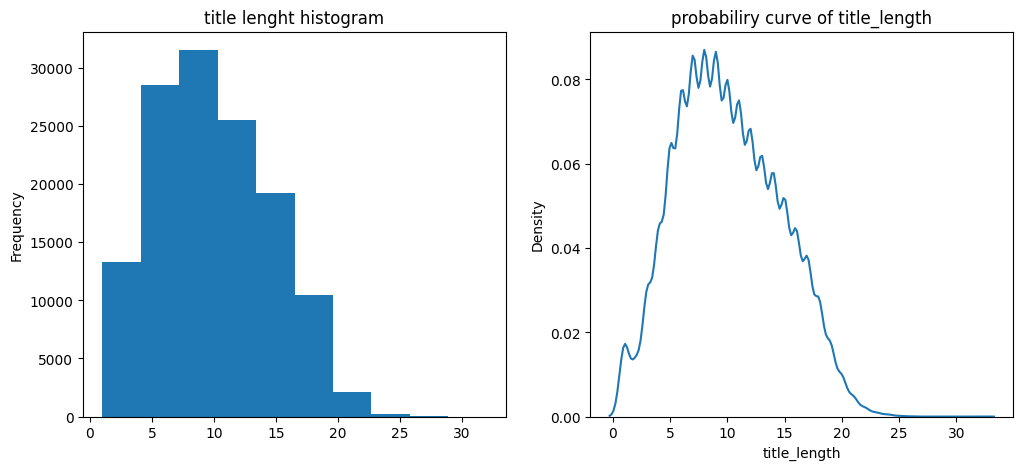

In [8]:
# title length histogram and KDE

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_meaningful['title_length'].plot(kind='hist', title="title lenght histogram")

plt.subplot(1, 2, 2)
kde = sn.kdeplot(data=df_meaningful, x='title_length')
kde.set_title('probabiliry curve of title_length')


plt.show()

Text(0.5, 1.0, 'most prominant words in title')

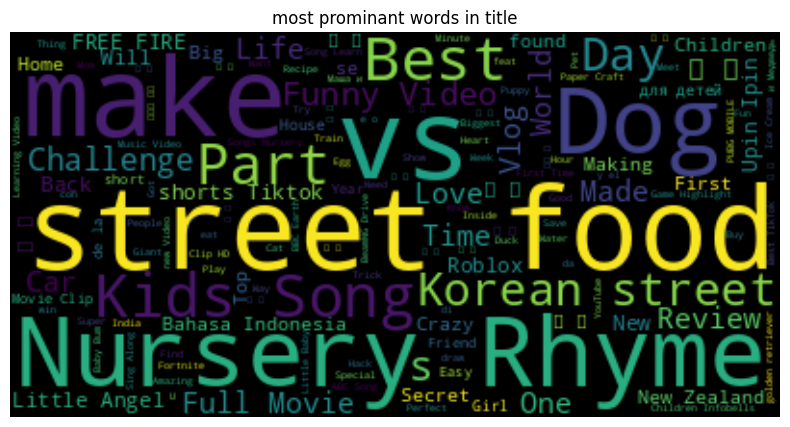

In [26]:
# feature engineering
from wordcloud import WordCloud, STOPWORDS


custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["V", "v"])
title_wordcloud = WordCloud(background_color='black',
                            stopwords=custom_stopwords).generate(text=" ".join(df_meaningful['title']))

plt.figure(figsize=(12, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('most prominant words in title')